In [60]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from preprocessing import *
from model.convolutional_neural_network import *
from sklearn.model_selection import KFold
from model.Executor import *
import warnings  
warnings.filterwarnings("ignore")

import torch.nn.functional as functional


# Training Data

The statistics on the size of our dataset.

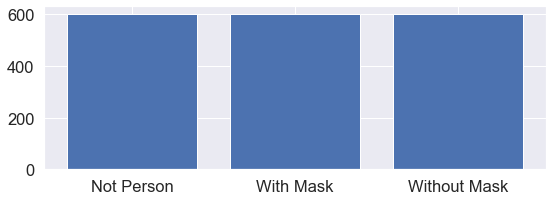

In [61]:
names = ['Not Person', 'With Mask', 'Without Mask']
N = []
N.append(len(os.listdir("./dataset/NotPerson")))
N.append(len(os.listdir("./dataset/WithMask")))
N.append(len(os.listdir("./dataset/WithoutMask")))
plt.figure(figsize=(9, 3))
plt.bar(names, N)
plt.show()

Create datasets for training and testing the model.

In [63]:
dataset = load_data("./dataset")
tr_ds, te_ds = split_data(dataset)
tr_loader = train_dataloarder(tr_ds)
te_loader = test_dataloarder(te_ds)


# Deep Learning

Implementing and training the CNN model.

In [47]:
num_epochs = 20
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(
    tr_loader,
    num_epochs
)


  0/20... rate=0 Hz, eta=?, total=0:00:00, wall=15:42 EST
current iter acc: 82.8148
current iter loss: 83.4849
  1/20... rate=0.06 Hz, eta=0:05:28, total=0:00:17, wall=15:42 EST
current iter acc: 86.0741
current iter loss: 72.8273
  2/20... rate=0.06 Hz, eta=0:05:24, total=0:00:36, wall=15:43 EST
current iter acc: 89.4815
current iter loss: 65.5100
  3/20... rate=0.06 Hz, eta=0:05:06, total=0:00:54, wall=15:43 EST
current iter acc: 89.8519
current iter loss: 59.9957
  4/20... rate=0.06 Hz, eta=0:04:45, total=0:01:11, wall=15:43 EST
current iter acc: 90.1481
current iter loss: 55.0733
  5/20... rate=0.06 Hz, eta=0:04:29, total=0:01:29, wall=15:44 EST
current iter acc: 86.8889
current iter loss: 50.4965
  6/20... rate=0.06 Hz, eta=0:04:13, total=0:01:48, wall=15:44 EST
current iter acc: 94.5926
current iter loss: 46.8241
  7/20... rate=0.05 Hz, eta=0:04:01, total=0:02:10, wall=15:44 EST
current iter acc: 92.5185
current iter loss: 44.4734
  8/20... rate=0.05 Hz, eta=0:03:50, total=0:02:3

In [56]:
testdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Model accuracy for test dataset :",testdata_accuracy)
print(len(te_ds))

Model accuracy for test dataset : 95.55555555555556
450


# Evaluation of Model (default one)

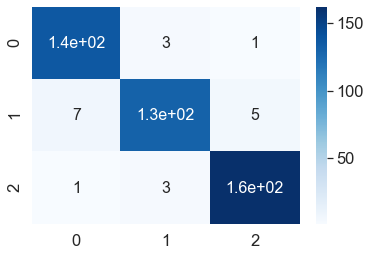

In [57]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

In [58]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       0.94      0.97      0.96       141
without mask       0.96      0.92      0.94       143
not a person       0.96      0.98      0.97       166

    accuracy                           0.96       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



# Saving the trained model.

In [59]:
save_path = os.path.join(os.path.abspath("."), "trained_model.pt")
torch.save(exec_obj.network.state_dict(), save_path)

In [81]:
exec_obj = Executor()

model = convolutional_neural_network.convolutional_neural_network()

model.load_state_dict(torch.load(save_path))

exec_obj.network = model

In [82]:
dataset_female = load_data("./biasTestData/Female")
dataset_male = load_data("./biasTestData/Male")
dataset_all = load_data("./biasTestData/All")

te_loader_female = test_dataloarder(dataset_female)
te_loader_male = test_dataloarder(dataset_male)
te_loader_all = test_dataloarder(dataset_all)

print("Model accuracy for test dataset(Female):", exec_obj.calculate_model_accuracy(te_loader_female))
print("Model accuracy for test dataset(Male):", exec_obj.calculate_model_accuracy(te_loader_male))
print("Model accuracy for test dataset(All):", exec_obj.calculate_model_accuracy(te_loader_all))



Model accuracy for test dataset(Female): 97.91666666666666
Model accuracy for test dataset(Male): 98.33333333333333
Model accuracy for test dataset(All): 97.6470588235294


# Evaluation the model - Female 

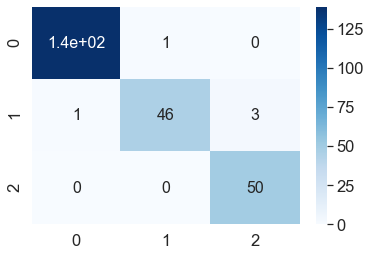

In [53]:
calc_model_weights, actual_results = next(iter(te_loader_female))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

In [36]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       0.98      0.98      0.98       140
without mask       0.96      0.90      0.93        50
not a person       0.94      1.00      0.97        50

    accuracy                           0.97       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.97      0.97      0.97       240



# Evaluation the model - Male 

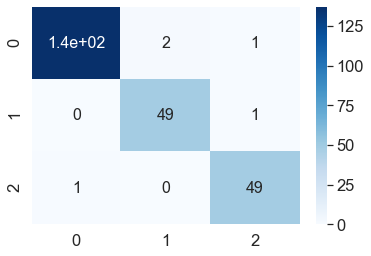

In [37]:
calc_model_weights, actual_results = next(iter(te_loader_male))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

# Evaluation: K-fold cross-validation on model(bias) and model (phase1)

In [64]:
def doKfold(executor_obj, dataset, num_of_folds=10, num_of_epochs=10):
    all_epoch_loss = []
    result_loss_vals = []
    result_acy_vals = []
    
    cnt = 0
    kfold_obj = KFold(num_of_folds, shuffle=True)
    kf_dataset = kfold_obj.split(dataset)

    for idx, (trn_idx_vals, tst_idx_vals) in enumerate(kf_dataset):
        print("\nStart---KFOLD iteration {}\n".format(idx))
        print("Index lengths -- train idxs:{} test idxs:{}".format(len(trn_idx_vals), len(tst_idx_vals)))
        
        trn_data_loader = torch.utils.data.DataLoader(
            dataset=torch.utils.data.Subset(dataset, trn_idx_vals), 
            shuffle=True,
            batch_size=50, 
            num_workers=2
        )
        
        tst_data_loader = torch.utils.data.DataLoader(
            dataset=torch.utils.data.Subset(dataset, tst_idx_vals), 
            shuffle=True,
            batch_size=50, 
            num_workers=2
        )
        
        all_loss, epoch_loss, accuracy_vals = exec_obj.training_model_executor(trn_data_loader,  num_of_epochs)
        avg_loss = np.mean(all_loss)
        avg_accuracy = np.mean(accuracy_vals)
        
        result_loss_vals.append(avg_loss)
        all_epoch_loss.append(epoch_loss)
        result_acy_vals.append(avg_accuracy)
        
        
    return all_epoch_loss, result_loss_vals, result_acy_vals
        
        
# taken in phase 1
kfold_exec_obj = Executor()        
        
all_epoch_loss, result_loss_vals, result_acy_vals = doKfold(kfold_exec_obj, tr_ds, num_of_folds=10, num_of_epochs=10)



Start---KFOLD iteration 0

Index lengths -- train idxs:1215 test idxs:135
  0/10... rate=0 Hz, eta=?, total=0:00:00, wall=16:27 EST
current iter acc: 35.5556
current iter loss: 94.8401
  1/10... rate=0.09 Hz, eta=0:01:39, total=0:00:11, wall=16:27 EST
current iter acc: 84.2798
current iter loss: 67.3425
  2/10... rate=0.10 Hz, eta=0:01:23, total=0:00:20, wall=16:27 EST
current iter acc: 92.1811
current iter loss: 53.7424
  3/10... rate=0.10 Hz, eta=0:01:11, total=0:00:30, wall=16:27 EST
current iter acc: 89.9588
current iter loss: 44.6713
  4/10... rate=0.10 Hz, eta=0:00:59, total=0:00:39, wall=16:27 EST
current iter acc: 95.6379
current iter loss: 38.7416
  5/10... rate=0.10 Hz, eta=0:00:48, total=0:00:48, wall=16:27 EST
current iter acc: 98.6008
current iter loss: 33.7231
  6/10... rate=0.10 Hz, eta=0:00:38, total=0:00:58, wall=16:28 EST
current iter acc: 98.6831
current iter loss: 29.8932
  7/10... rate=0.10 Hz, eta=0:00:28, total=0:01:07, wall=16:28 EST
current iter acc: 99.0947
c

current iter acc: 100.0000
current iter loss: 0.0210
  2/10... rate=0.10 Hz, eta=0:01:23, total=0:00:20, wall=16:37 EST
current iter acc: 100.0000
current iter loss: 0.0170
  3/10... rate=0.10 Hz, eta=0:01:10, total=0:00:30, wall=16:37 EST
current iter acc: 100.0000
current iter loss: 0.0153
  4/10... rate=0.10 Hz, eta=0:00:59, total=0:00:39, wall=16:37 EST
current iter acc: 100.0000
current iter loss: 0.0134
  5/10... rate=0.10 Hz, eta=0:00:48, total=0:00:48, wall=16:38 EST
current iter acc: 100.0000
current iter loss: 0.0120
  6/10... rate=0.10 Hz, eta=0:00:38, total=0:00:58, wall=16:38 EST
current iter acc: 100.0000
current iter loss: 0.0112
  7/10... rate=0.10 Hz, eta=0:00:29, total=0:01:08, wall=16:38 EST
current iter acc: 100.0000
current iter loss: 0.0108
  8/10... rate=0.10 Hz, eta=0:00:19, total=0:01:18, wall=16:38 EST
current iter acc: 100.0000
current iter loss: 0.0108
  9/10... rate=0.10 Hz, eta=0:00:09, total=0:01:27, wall=16:38 EST
current iter acc: 100.0000
current iter 

# Re train using kfold with the model used for bias

In [83]:
bmodel_epoch_loss, bmodel_loss_vals, bmodel_acy_vals = doKfold(
    exec_obj, tr_ds, num_of_folds=10, num_of_epochs=10
)


Start---KFOLD iteration 0

Index lengths -- train idxs:1215 test idxs:135
  0/10... rate=0 Hz, eta=?, total=0:00:00, wall=17:44 EST
current iter acc: 98.7654
current iter loss: 2.9740
  1/10... rate=0.10 Hz, eta=0:01:28, total=0:00:09, wall=17:44 EST
current iter acc: 99.0123
current iter loss: 2.9740
  2/10... rate=0.10 Hz, eta=0:01:23, total=0:00:20, wall=17:45 EST
current iter acc: 98.9300
current iter loss: 2.9740
  3/10... rate=0.10 Hz, eta=0:01:10, total=0:00:30, wall=17:45 EST
current iter acc: 98.9300
current iter loss: 2.9740
  4/10... rate=0.10 Hz, eta=0:00:59, total=0:00:39, wall=17:45 EST
current iter acc: 99.0123
current iter loss: 2.9740
  5/10... rate=0.10 Hz, eta=0:00:48, total=0:00:48, wall=17:45 EST
current iter acc: 99.0123
current iter loss: 2.9740
  6/10... rate=0.10 Hz, eta=0:00:38, total=0:00:57, wall=17:45 EST
current iter acc: 99.0123
current iter loss: 2.9740
  7/10... rate=0.10 Hz, eta=0:00:28, total=0:01:07, wall=17:45 EST
current iter acc: 98.9300
current 

current iter acc: 99.0123
current iter loss: 3.3502
  3/10... rate=0.11 Hz, eta=0:01:03, total=0:00:27, wall=17:55 EST
current iter acc: 98.9300
current iter loss: 3.2384
  4/10... rate=0.11 Hz, eta=0:00:54, total=0:00:36, wall=17:55 EST
current iter acc: 98.8477
current iter loss: 3.2372
  5/10... rate=0.11 Hz, eta=0:00:45, total=0:00:45, wall=17:55 EST
current iter acc: 98.9300
current iter loss: 3.2220
  6/10... rate=0.11 Hz, eta=0:00:36, total=0:00:54, wall=17:55 EST
current iter acc: 98.8477
current iter loss: 3.2013
  7/10... rate=0.11 Hz, eta=0:00:27, total=0:01:04, wall=17:55 EST
current iter acc: 98.9300
current iter loss: 3.2013
  8/10... rate=0.11 Hz, eta=0:00:18, total=0:01:14, wall=17:56 EST
current iter acc: 98.9300
current iter loss: 3.1982
  9/10... rate=0.11 Hz, eta=0:00:09, total=0:01:24, wall=17:56 EST
current iter acc: 98.9300
current iter loss: 3.1982
 10/10... rate=0.11 Hz, eta=0:00:00, total=0:01:33, wall=17:56 EST

Start---KFOLD iteration 7

Index lengths -- tra

# Save the Kfold trained Model (bias)

In [84]:
bias_kfold_save_path = os.path.join(os.path.abspath("."), "Kfold_bias_retrained_model.pt")
torch.save(exec_obj.network.state_dict(), bias_kfold_save_path)


for i in range(0, len(bmodel_epoch_loss)):
    print("Agg Accuracy at fold: {} is {}%".format(i, bmodel_acy_vals[i]))
    print("Agg loss at fold: {} is {}%".format(i, np.mean(bmodel_epoch_loss[i])))
    print("----")

Agg Accuracy at fold: 0 is 98.95473251028807%
Agg loss at fold: 0 is 0.03102311270302993%
----
Agg Accuracy at fold: 1 is 98.85596707818931%
Agg loss at fold: 1 is 0.0323603571165257%
----
Agg Accuracy at fold: 2 is 98.76543209876543%
Agg loss at fold: 2 is 0.03517227870821629%
----
Agg Accuracy at fold: 3 is 98.97942386831275%
Agg loss at fold: 3 is 0.030115666250505352%
----
Agg Accuracy at fold: 4 is 98.88888888888889%
Agg loss at fold: 4 is 0.03223901338565227%
----
Agg Accuracy at fold: 5 is 99.10288065843622%
Agg loss at fold: 5 is 0.0302970594346745%
----
Agg Accuracy at fold: 6 is 98.90534979423867%
Agg loss at fold: 6 is 0.033319162130361936%
----
Agg Accuracy at fold: 7 is 98.88065843621399%
Agg loss at fold: 7 is 0.0313108785370438%
----
Agg Accuracy at fold: 8 is 98.97119341563786%
Agg loss at fold: 8 is 0.030360297517342188%
----
Agg Accuracy at fold: 9 is 98.81481481481481%
Agg loss at fold: 9 is 0.031698159617432886%
----


# Save the Kfold trained Model (phase 1)

In [79]:
kfold_save_path = os.path.join(os.path.abspath("."), "Kfold_trained_model.pt")
torch.save(kfold_exec_obj.network.state_dict(), kfold_save_path)


for i in range(0, len(all_epoch_loss)):
    print("Agg Accuracy at fold: {} is {}%".format(i, result_acy_vals[i]))
    print("Agg loss at fold: {} is {}%".format(i, np.mean(all_epoch_loss[i])))
    print("----")

Agg Accuracy at fold: 0 is 89.31687242798353%
Agg loss at fold: 0 is 0.4353670683865668%
----
Agg Accuracy at fold: 1 is 99.48148148148148%
Agg loss at fold: 1 is 0.04097933145379633%
----
Agg Accuracy at fold: 2 is 99.67901234567901%
Agg loss at fold: 2 is 0.01350003923280026%
----
Agg Accuracy at fold: 3 is 100.0%
Agg loss at fold: 3 is 0.0006563433963091903%
----
Agg Accuracy at fold: 4 is 100.0%
Agg loss at fold: 4 is 8.472923737567437e-05%
----
Agg Accuracy at fold: 5 is 100.0%
Agg loss at fold: 5 is 0.00027460989525747036%
----
Agg Accuracy at fold: 6 is 100.0%
Agg loss at fold: 6 is 0.00015121599856276937%
----
Agg Accuracy at fold: 7 is 100.0%
Agg loss at fold: 7 is 4.509768153135094e-05%
----
Agg Accuracy at fold: 8 is 100.0%
Agg loss at fold: 8 is 6.55700722342956e-05%
----
Agg Accuracy at fold: 9 is 100.0%
Agg loss at fold: 9 is 0.00016022940437205473%
----


# Load the Kfold trained Model

In [85]:
kfold_exec_obj = Executor()

model = convolutional_neural_network.convolutional_neural_network()

model.load_state_dict(torch.load(kfold_save_path))

kfold_exec_obj.network = model

In [86]:
testdata_accuracy = kfold_exec_obj.calculate_model_accuracy(te_loader)
print("Kfold applied phase-1 Model accuracy for test dataset :",testdata_accuracy)
print(len(te_ds))

bias_kf_tstdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Kfold applied retrained bias Model accuracy for test dataset :",bias_kf_tstdata_accuracy)
print(len(te_ds))



Kfold applied phase-1 Model accuracy for test dataset : 97.55555555555556
450
Kfold applied retrained bias Model accuracy for test dataset : 96.22222222222221
450


# Evaluating the retrained Model (bias) after running KFold

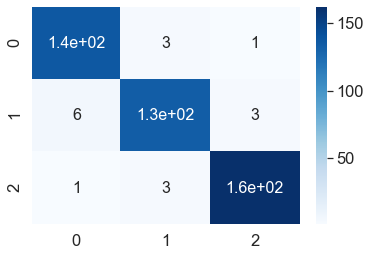

              precision    recall  f1-score   support

   with mask       0.95      0.97      0.96       141
without mask       0.96      0.94      0.95       143
not a person       0.98      0.98      0.98       166

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [87]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()


report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

# Evaluating the Model(phase 1) after running KFold

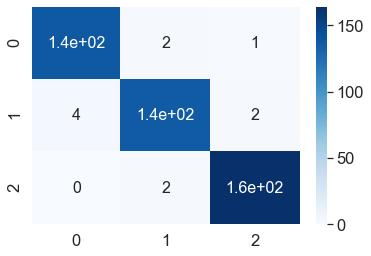

              precision    recall  f1-score   support

   with mask       0.97      0.98      0.98       141
without mask       0.97      0.96      0.96       143
not a person       0.98      0.99      0.98       166

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.98       450
weighted avg       0.98      0.98      0.98       450



In [88]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = kfold_exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  